In [1]:
# Jar 1 has 40 blue marbles, 30 red marbles, and 30 green marbles.
# Jar 2 has 60 blue marbles, 20 red marbles, and 20 green marbles.
# Jar 3 has 10 blue marbles, 20 red marbles, and 70 green marbles.

# You pick a marble from one of the jars at random, and the marble is green. 
# What are the probabilities that the marble came from each of the three jars?

import numpy as np

def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

blue = [40, 60, 10]
red = [30, 20, 20]
green = [30, 20, 70]

In [2]:
priors = [1/3, 1/3, 1/3]
likelihoods = []

for i in range(len(blue)):
    likelihoods.append(green[i] / (blue[i] + red[i] + green[i]))

bayes_rule(priors, likelihoods)

array([0.25      , 0.16666667, 0.58333333])

In [3]:
likelihoods = []

for i in range(len(blue)):
    likelihoods.append(blue[i] / (blue[i] + red[i] + green[i]))

bayes_rule(priors, likelihoods)

array([0.36363636, 0.54545455, 0.09090909])

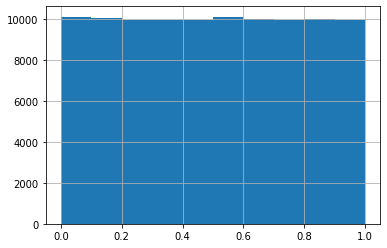

In [8]:
# Suppose we have just launched an online store that sells fidget spinners, and we are trying to estimate what percentage 
# of visitors to our online store will make a purchase.

import pandas as pd

n_draws = 100000
prior_uniform = pd.Series(np.random.uniform(0, 1, size = n_draws))

prior_uniform.hist()

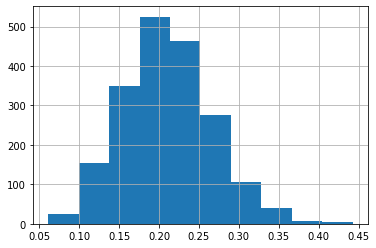

In [6]:
observed = 10

def generative_binomial_model(*params):
    result = np.random.binomial(params[0], params[1])
    return result

sim_binomial_data = []

for i in prior_uniform:
    sim_binomial_data.append(generative_binomial_model(50, i))

posterior = prior_uniform[list(map(lambda x: x == observed, sim_binomial_data))]

posterior.hist()

In [7]:
posterior.describe()

count    1949.000000
mean        0.210853
std         0.056149
min         0.061080
25%         0.172486
50%         0.208455
75%         0.246766
max         0.442650
dtype: float64